In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Creating engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declaring a base using 'automap_base()'
Base = automap_base()

# Using the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Printing all the classes mapped to the base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Assigning classes to variables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Creating a database session object
session = Session(engine)

In [10]:
# Creating an inspect object for classes
inspector = inspect(engine)

# Inspecting the measurement class
measurement_inspect = inspector.get_columns('measurement')
measurement_columns = [c['name'] for c in measurement_inspect]
measurement_types = [t['type'] for t in measurement_inspect]
print('Measurement: ')
print(measurement_columns)
print(measurement_types)
print('-'*50)

# Inspecting the station class
station_inspect = inspector.get_columns('station')
station_columns = [c['name'] for c in station_inspect]
station_types = [t['type'] for t in station_inspect]
print('Station: ')
print(station_columns)
print(station_types)

Measurement: 
['id', 'station', 'date', 'prcp', 'tobs']
[INTEGER(), TEXT(), TEXT(), FLOAT(), FLOAT()]
--------------------------------------------------
Station: 
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']
[INTEGER(), TEXT(), TEXT(), FLOAT(), FLOAT(), FLOAT()]


# Exploratory Climate Analysis

# Precipitation Analysis

In [11]:
# Retrieving the lastest measurement date
latest_measurement_date = session.query(Measurement.date).\
                          order_by(Measurement.date.desc()).first()

# Converting the a usable date object
latest_date = dt.datetime.strptime(latest_measurement_date[0], '%Y-%m-%d').date()
print(latest_date)

2017-08-23


In [12]:
# Calculating the date 1 year ago from the last data point in the database
last_12_months = latest_date - relativedelta(months = 12)
print(last_12_months)

2016-08-23


In [13]:
# Perform a query to retrieve the date and precipitation scores
prcp_last_12_months = session.query(Measurement.date, Measurement.prcp).\
                      filter(Measurement.date >= last_12_months).all()
prcp_last_12_months

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_last_12_months).set_index('date')
prcp_df = prcp_df.dropna()
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [15]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_index(ascending=True)
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


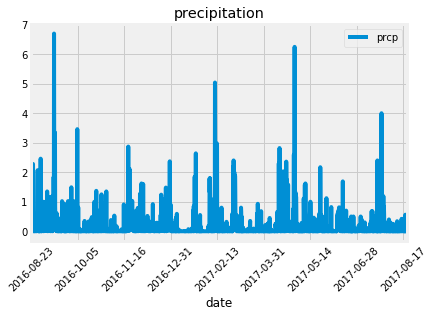

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize = (6,4), rot=45, title = 'precipitation', legend=True)
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [18]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9)]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
select = [Measurement.station, func.count(Measurement.station), Station.name]

station_activity = session.query(*select).filter(Station.station == Measurement.station).\
                   group_by(Measurement.station).\
                   order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772, 'WAIHEE 837.5, HI US'),
 ('USC00519397', 2724, 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 2709, 'KANEOHE 838.1, HI US'),
 ('USC00519523', 2669, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00516128', 2612, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00514830', 2202, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00511918', 1979, 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00517948', 1372, 'PEARL CITY, HI US'),
 ('USC00518838', 511, 'UPPER WAHIAWA 874.3, HI US')]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
select = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

temp_stats_active_station = session.query(*select).filter(Measurement.station == station_activity[0][0]).all()
temp_stats_active_station

[(54.0, 85.0, 71.66378066378067)]

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_stats_active_station = session.query(Measurement.tobs).filter(Measurement.station == station_activity[0][0]).\
                            filter(Measurement.date >= last_12_months).all()
temp_list_results = np.ravel(temp_stats_active_station)

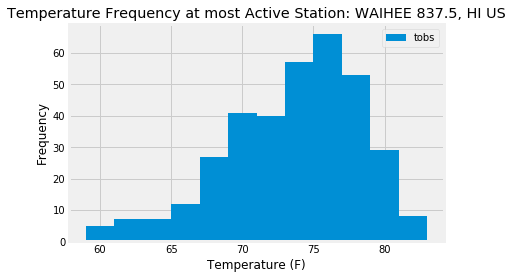

In [23]:
plt.hist(temp_list_results, bins = 12, label='tobs')
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.title("Temperature Frequency at most Active Station: " + station_activity[0][2])
plt.legend(loc='upper right')
plt.show()

# Temperature Analysis I 

In [24]:
# Months to be queried
june_str = "06"
december_str = "12"

# Calculating the average temperatures for June and December
june_avg_temp = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == june_str).all()
december_avg_temp = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == december_str).all()

# Querying the observed temperatures for June and December
june_temperatures = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == june_str).all()
december_temperatures = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == december_str).all()

print(f'June Average Temperature: {june_avg_temp[0][0]}')
print(f'December Average Temperature: {december_avg_temp[0][0]}')
print('-----------------------------------------------------')
print(stats.ttest_ind(june_temperatures, december_temperatures, equal_var=False))
print('-----------------------------------------------------')
print('No significant statistal difference!')

June Average Temperature: 74.94411764705882
December Average Temperature: 71.04152933421226
-----------------------------------------------------
Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))
-----------------------------------------------------
No significant statistal difference!


# Tempearture Analysis II

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2016-07-11', '2016-07-17')

[(71.0, 77.26666666666667, 82.0)]

Trip Dates: 2016-07-11, 2016-07-17


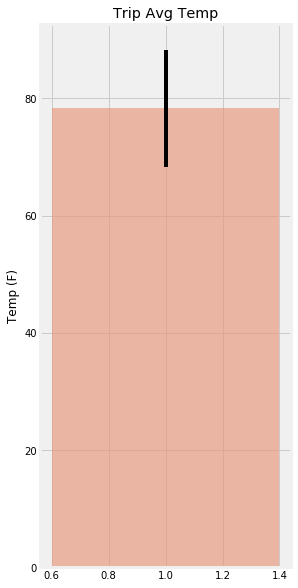

In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
print('Trip Dates: 2016-07-11, 2016-07-17')

trip_start_date = dt.datetime.strptime('2017-07-11', '%Y-%m-%d').date()
trip_end_date = dt.datetime.strptime('2017-07-17', '%Y-%m-%d').date()

tavg = calc_temps(trip_start_date, trip_end_date)[0][1]
tmin = calc_temps(trip_start_date, trip_end_date)[0][0]
tmax = calc_temps(trip_start_date, trip_end_date)[0][2]

plt.figure(figsize = (4,10))
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.bar(1, tavg, yerr = (tmax - tmin), color = 'darksalmon', alpha = .65)
plt.show()

## Optional Challenge Assignment

In [41]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
select = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
station_rainfall = session.query(*select).filter(Station.station == Measurement.station).\
                   filter(Measurement.date >= last_12_months).\
                   group_by(Measurement.station).\
                   order_by(func.sum(Measurement.prcp).desc()).all()
station_rainfall

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]